# DALI machine optics

## Najmeh Mirian 
4 Dec 2024

Here we have the lattices of Positron source and transfer line to FIR laser. 


In [1]:
import IPython
import numpy
import time
import scipy
import matplotlib
import ocelot
print('ocelot:', ocelot.__version__)
from __future__ import print_function
%matplotlib inline
from ocelot import *
#from Ocelot graphical modules
from ocelot.gui.accelerator import *
#from DALI_lattice import *

initializing ocelot...
ocelot: 24.03.0


# The linac section 
T0 is gun section 
T1 is the transport to the sepration including the kicker and diagnostic section 

In [2]:
from DALI_lattice import *
# this is the lattice of the accelerator section injector to 1,5m after RF kicker 
#T0 is the transfer line from SRF gun to linac section
#T1 is the transfer linac to seperation 

0.7853981633974483 0.23561944901923448 0.19634954084936207
0.2617993877991494


In [3]:
def Dipol_length(E_GeV, theta, B_T):
    r=1/(0.299792458* B_T/E_GeV)
    print('the Curvature radius in m:', r)
    
    L=r*np.sin(theta)
    print('the Dipole Lenght in m:', L)
    return


In [4]:
lat = MagneticLattice(T02T1) 

In [5]:
# initialization of Twiss object
tws0 = Twiss()
# defining initial twiss parameters
tws0.beta_x = 29.171
tws0.beta_y = 29.171
tws0.alpha_x = 10.955
tws0.alpha_y = 10.955
tws0.emit_x = 10e-6
tws0.emit_y = 10e-6
# defining initial electron energy in GeV
tws0.E = 0.005 #  5 mev /// 0.005 Gev 

# calculate optical functions with initial twiss parameters
tws = twiss(lat, tws0, nPoints=None)

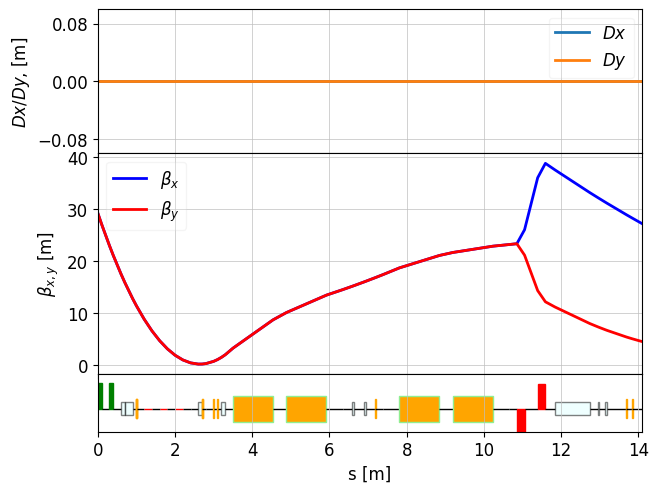

In [6]:
plot_opt_func(lat, tws, top_plot=["Dx", "Dy"],  fig_name="i1", legend=False)
plt.show()

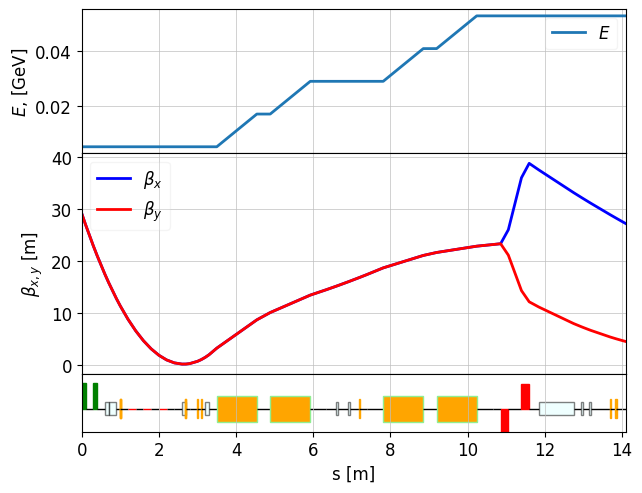

In [7]:
plot_opt_func(lat, tws, top_plot=["E"], fig_name=0, legend=False)
plt.show()

# POSITRON Sourcec 
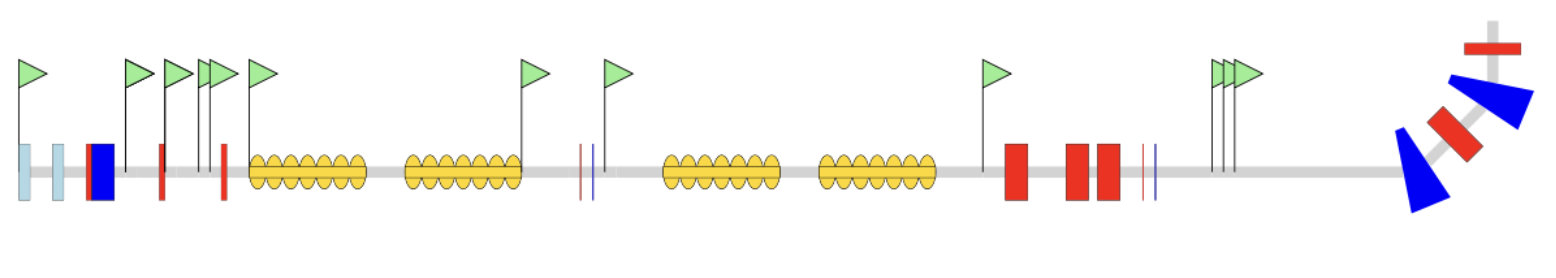

In [8]:
# Elbe bending magnect parameters  90 deg spreader 
import math
# deflection angle of dipoles
fl1b_a = 45.0 * math.pi / 180.0
# reference trajectory length through dipoles
fl1b_l = 0.300 * fl1b_a
# edge angles of dipoles
fl1b_e = 11.25 * math.pi / 180.0
print(fl1b_a, fl1b_l,fl1b_e)
septum_angle=15*math.pi/180
print(septum_angle)
Dipol_length(0.05,fl1b_a, 0.5)

0.7853981633974483 0.23561944901923448 0.19634954084936207
0.2617993877991494
the Curvature radius in m: 0.33356409519815206
the Dipole Lenght in m: 0.2358654336749684


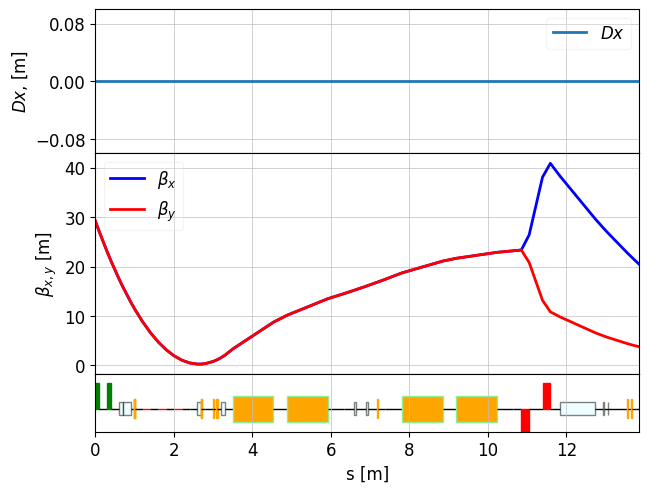

In [9]:
Q1L=Quadrupole( l = 0.20, k1 = -2.9876543209874, tilt = 0.00, eid ='Q.1.L')
Q2L=Quadrupole( l = 0.20, k1 = 3.04783950617284, tilt = 0.00, eid='Q.2.L')
CX1L=Hcor( l = 0.010, angle=0.0, eid = 'CX.1.L')
CY1L=Vcor( l = 0.010, angle=0.0, eid = 'CY.1.L')
BPM3L=Monitor(eid='BPM.3.L')
BPM4L=Monitor(eid='BPM.4.L')
LN1_FITT1= Marker(eid='LN1_FITT1')
D0080= Drift(l=0.08)
D034=Drift(l=0.34)
D080= Drift(l=0.8)
D050= Drift(l=0.5)
KFBX1T1 =   Hcor(l = 0.90,  angle=0.0, eid = 'KFBX.1.T1')
D06 = Drift(l=0.600)
D015= Drift( l = 0.15)
D035= Drift( l = 0.35)
D020= Drift( l = 0.20)
ENDLINAC=   Marker()
D100=Drift(l=1.000)
T1=(D020,  Q1L,D034,  Q2L, D025,KFBX1T1,D020, CX1L, 
D010, CY1L, D050,BPM3L, D010,  BPM4L, D010,LN1_FITT1,D010)
T02T1=(T0,LINAC, T1)
lat = MagneticLattice(T02T1) 
tws = twiss(lat, tws0, nPoints=None)
plot_opt_func(lat, tws,fig_name=0, legend=False)
plt.show()

In [10]:
print(tws[-1])

emit_x  = 1e-05
emit_y  = 1e-05
beta_x  = 20.40584148719079
beta_y  = 3.7432608298530403
alpha_x = 3.696892244671021
alpha_y = 0.9717842720067082
gamma_x = 0.7187653730386739
gamma_y = 0.5194307208872601
Dx      = 0.0
Dy      = 0.0
Dxp     = 0.0
Dyp     = 0.0
mux     = 3.4412363556202594
muy     = 3.749722693024984
nu_x    = 0.5476897763445037
nu_y    = 0.5967869018187798
E       = 0.053000000000000005
s        = 13.863999999999997



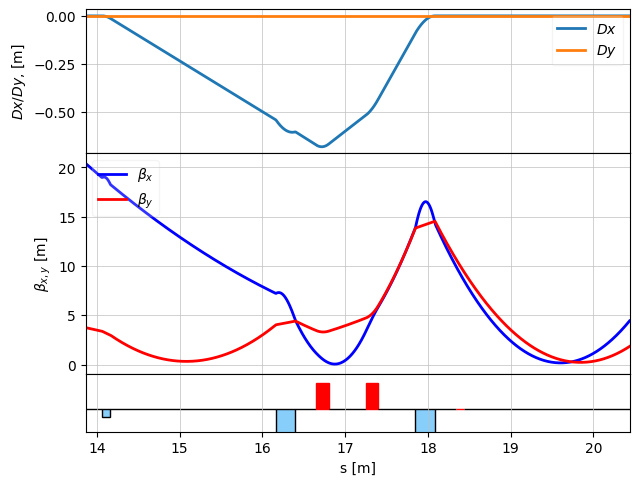

In [11]:

# Design of Transfer to Position Source  TPS

D010 = Drift(l=0.1)
D025 = Drift(l=0.25)
D010 = Drift(l=0.10)
D045 = Drift(l=0.45)
D120 = Drift(l=2)
M1= Marker(eid='M1')
# defining of the quads
Q1TPS = Quadrupole(l=0.15, k1=5.977873987227499)
Q2TPS = Quadrupole(l=0.15, k1=6.0263520817110265)
Q3TPS= Quadrupole(l=0.1, k1=0)
# defining of the bending magnet
#Septom magnet 
BsTPS=SBend(l=0.1, angle=-septum_angle, e1=-septum_angle/2, e2=-septum_angle/2, tilt=0.0, fint=0.0, eid='PS_bend')
BTPS=SBend(l=fl1b_l, angle=-fl1b_a, e1=-fl1b_e, e2=-fl1b_e, tilt=0.0, fint=0.0, eid='PS_bend')

Tranport_to_PS=(D020,BsTPS, D200, BTPS,D025, Q1TPS, D045,Q2TPS, D045, BTPS,M1, D025, Q3TPS, D120 ,M1)
lat_Tranport_to_PS = MagneticLattice(Tranport_to_PS)

tws_Tranport_to_PS = twiss(lat_Tranport_to_PS,tws[-1] ,nPoints=1000)

# plot optical functions.
plot_opt_func(lat_Tranport_to_PS, tws_Tranport_to_PS, top_plot = ["Dx", "Dy"], legend=False, font_size=10)
plt.show()

In [12]:
constr = {M1:{'Dx':0.0000, 'Dy':0.000}, 'periodic':False}
# variables
vars = [Q1TPS, Q2TPS]
# initial condition for twiss
tw0=tws[-1]
match(lat_Tranport_to_PS, constr, vars, tw0, verbose=False)
print('Q1TPS.k1=', Q1TPS.k1 )
print('Q2TPS.k1=', Q2TPS.k1 )

initial value: x =  [5.977873987227499, 6.0263520817110265]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 32
         Function evaluations: 64
Q1TPS.k1= 5.977881058120479
Q2TPS.k1= 6.026347003840488


length of the cell:  20.435238898038463 m


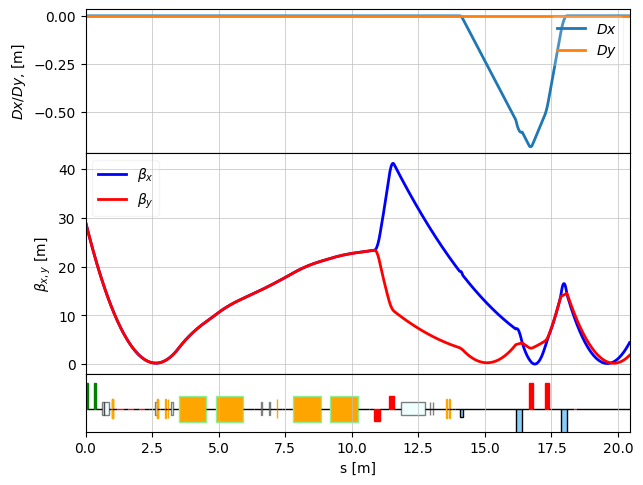

In [13]:
PS_lat=(T02T1, Tranport_to_PS)

latPS = MagneticLattice(PS_lat)
# to see total lenth of the lattice 
print("length of the cell: ", latPS.totalLen, "m")

twsPS = twiss(latPS,tws0 ,nPoints=1000)
# plot optical functions.
plot_opt_func(latPS, twsPS, top_plot = ["Dx", "Dy"], legend=False, font_size=10)
plt.show()

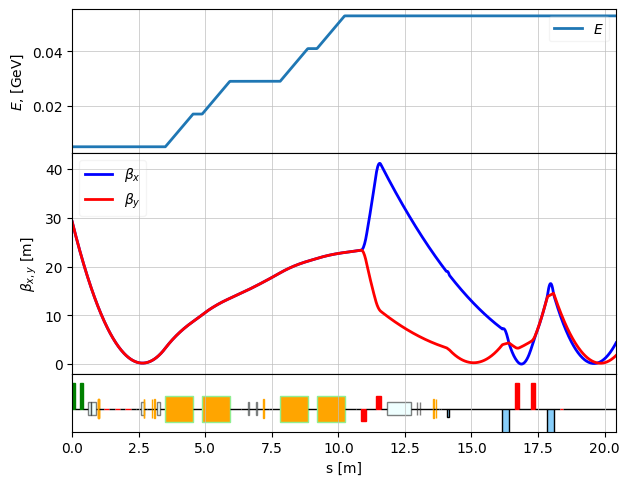

In [14]:
plot_opt_func(latPS, twsPS, top_plot = ["E"], legend=False, font_size=10)
plt.show()

In [15]:
print(tws[-1])

emit_x  = 1e-05
emit_y  = 1e-05
beta_x  = 20.40584148719079
beta_y  = 3.7432608298530403
alpha_x = 3.696892244671021
alpha_y = 0.9717842720067082
gamma_x = 0.7187653730386739
gamma_y = 0.5194307208872601
Dx      = 0.0
Dy      = 0.0
Dxp     = 0.0
Dyp     = 0.0
mux     = 3.4412363556202594
muy     = 3.749722693024984
nu_x    = 0.5476897763445037
nu_y    = 0.5967869018187798
E       = 0.053000000000000005
s        = 13.863999999999997



# FIR sources 
Far infrared radition 

Design of Transfer line to Far infrared radiation  (TIR)

We have two branches , they are similar north and sauth branch 


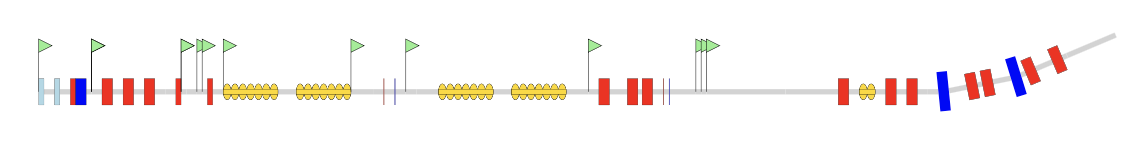

In [16]:
Dipol_length(0.05,0.5, 0.39)

the Curvature radius in m: 0.4276462758950667
the Dipole Lenght in m: 0.20502454615307394


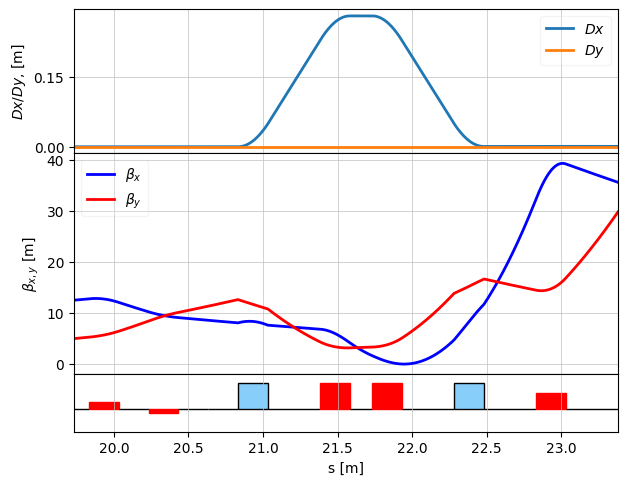

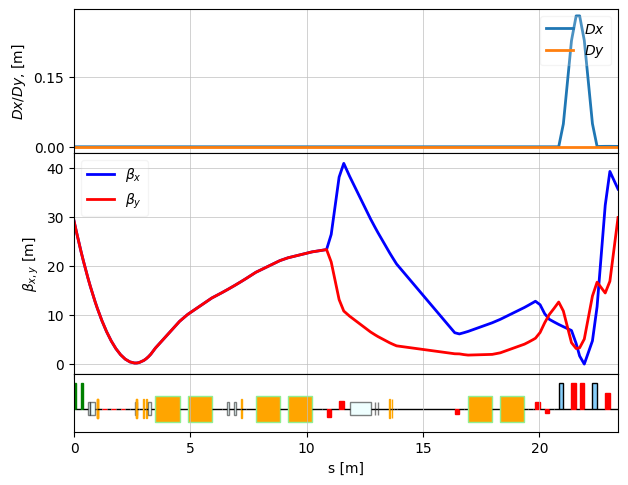

In [17]:

D250 = Drift(l=2.5)
D020 = Drift(l=0.2)
D020 = Drift(l=0.2)
D035=Drift(l=0.35)

QTIR1 = Quadrupole(l=0.2, k1=-2)
QTIR2 = Quadrupole(l=0.20, k1=2.5)
QTIR3 = Quadrupole(l=0.2, k1=-1.5)

CLARCH1 = Cavity(l=1.038, v=0.0, freq=1.3e9, phi=0.0, eid='LA1RC10')
DCLAD0346 = Drift(l=0.346)
CLARCh2 = Cavity(l=1.038, v=0.0, freq=1.3e9, phi=0.0, eid='LA1RC20')
DCLAD0 = Drift(l=0.346/2)

ChirRC1=(DCLAD0, CLARCH1,DCLAD0346,CLARCh2,DCLAD0 )
D015=Drift(l=0.15)
###
cellTIR = (D250, QTIR1, D020, ChirRC1, D020)
latTIR = MagneticLattice(cellTIR)
twsTIR= twiss(latTIR,tws[-1] ,nPoints=1000)
#
BTIR=SBend(l=0.2, angle=0.5, e1=0.25, e2=0.25, tilt=0.0, fint=0.0, eid='IR_bend')  # angle= 
QTIR4 = Quadrupole(l=0.2, k1=9.71)
QTIR5 = Quadrupole(l=0.2, k1=6)
QTIR6 = Quadrupole(l=0.2, k1=-5)

D010=Drift(l=0.1)
CELLTSIR=(  D010,QTIR2, D020, QTIR3, D020,D020, BTIR, D035, QTIR4,D015, QTIR4, D035,BTIR, D035,QTIR5, D035)#,QTIR6,D035)
latTSIR = MagneticLattice(CELLTSIR)
twsTSIR= twiss(latTSIR,twsTIR[-1] ,nPoints=1000)
# plot optical functions.
plot_opt_func(latTSIR, twsTSIR, top_plot = ["Dx", "Dy"], legend=False, font_size=10)
plt.show()
TIR_cell=(T02T1,cellTIR, CELLTSIR )
TSIR_lat = MagneticLattice(TIR_cell)
twsSIR= twiss(TSIR_lat,tws0 )


# plot optical functions.
plot_opt_func(TSIR_lat, twsSIR, top_plot = ["Dx", "Dy"], legend=False, font_size=10)
plt.show()

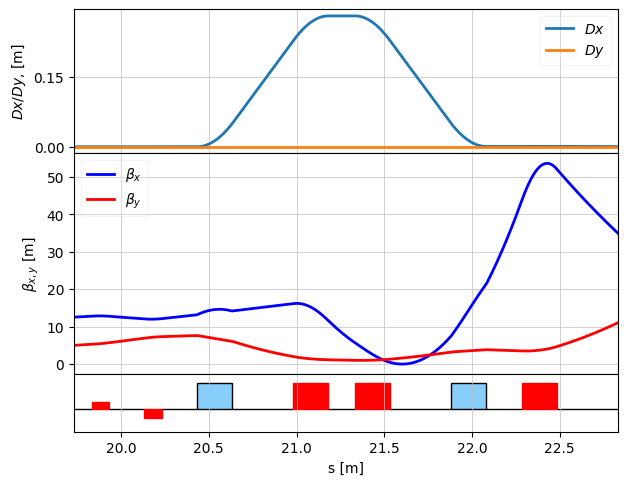

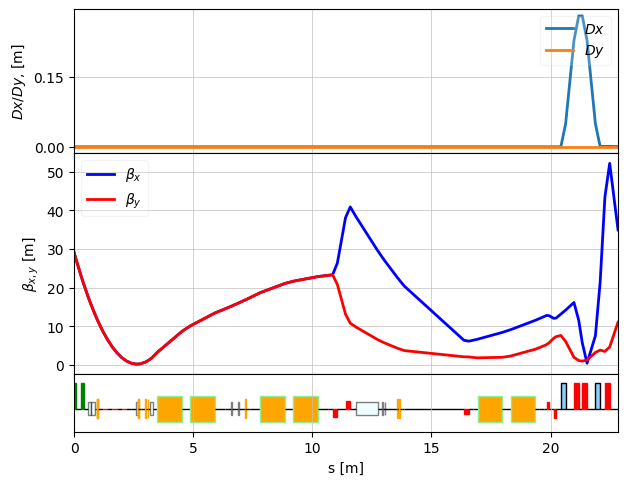

In [18]:
QTIR2 = Quadrupole(l=0.10, k1=2.5)
QTIR3 = Quadrupole(l=0.1, k1=-3.5)
BTIR=SBend(l=0.2, angle=0.5, e1=0.25, e2=0.25, tilt=0.0, fint=0.0, eid='IR_bend')  # angle= 
QTIR4 = Quadrupole(l=0.2, k1=9.71)
QTIR5 = Quadrupole(l=0.2, k1=9.5)
QTIR6 = Quadrupole(l=0.2, k1=-2.5)

D010=Drift(l=0.1)
D015=Drift(l=0.15)
CELLTSIR=(  D010,QTIR2, D020, QTIR3, D020, BTIR, D035, QTIR4,D015, QTIR4, D035,BTIR, D020,QTIR5, D035)#,QTIR6,D035)
latTSIR = MagneticLattice(CELLTSIR)
twsTSIR= twiss(latTSIR,twsTIR[-1] ,nPoints=1000)
#plot optical functions.
plot_opt_func(latTSIR, twsTSIR, top_plot = ["Dx", "Dy"], legend=False, font_size=10)
plt.show()

TIR_cell=(T02T1,cellTIR, CELLTSIR )
TSIR_lat = MagneticLattice(TIR_cell)
twsSIR= twiss(TSIR_lat,tws0 )


# plot optical functions.
plot_opt_func(TSIR_lat, twsSIR, top_plot = ["Dx", "Dy"], legend=False, font_size=10)
plt.show()

tws00 = Twiss() # by default the all parameters are zero 
tws00.E = 0.05 # GeV
#tws = twiss(latTSIR, tws0=tws00)
#print(tws00)
#plot_opt_func(latTSIR, tws, legend=False)
#plt.show()

# Second line

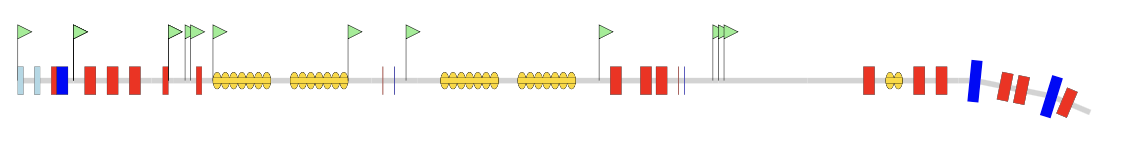

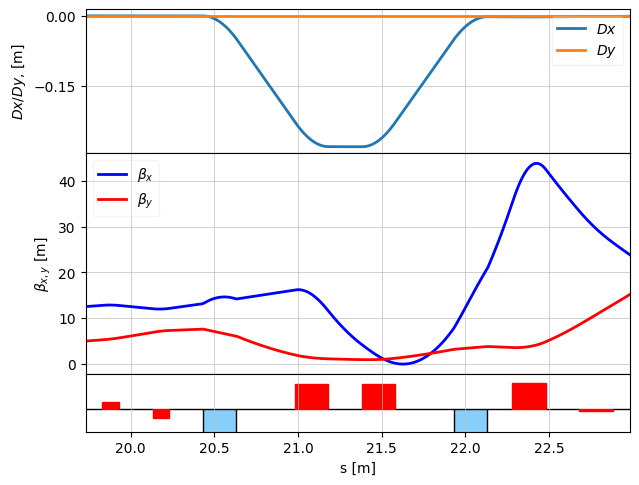

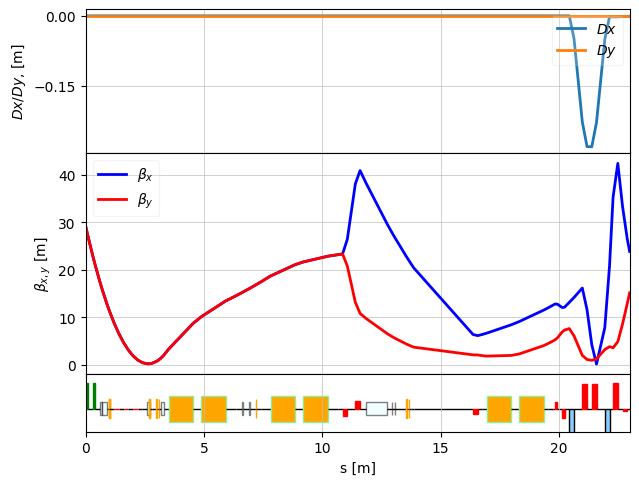

In [19]:
BTIR2=SBend(l=0.2, angle=-0.5, e1=-0.25, e2=-0.25, tilt=0.0, fint=0.0, eid='IR_bend')
QTIR2_1 = Quadrupole(l=0.2, k1=9.69)
QTIR2_2 = Quadrupole(l=0.2, k1=10)
QTIR2_3 = Quadrupole(l=0.2, k1=-1)
#QTIR8 = Quadrupole(l=0.2, k1=-8.5)
D035=Drift(l=0.35)
D015=Drift(l=0.15)
CELLTSIR2=(D010,QTIR2, D020, QTIR3, D020, BTIR2, D035, QTIR2_1,D020, QTIR2_1, D035,BTIR2, D015,QTIR2_2, D020, QTIR2_3, D010)

latTSIR2 = MagneticLattice(CELLTSIR2)
twsTSIR2= twiss(latTSIR2,twsTIR[-1] ,nPoints=1000)

plot_opt_func(latTSIR2, twsTSIR2, top_plot = ["Dx", "Dy"], legend=False, font_size=10)
plt.show()
TIR_cell2=(T02T1,cellTIR, CELLTSIR2 )
TSIR_lat2= MagneticLattice(TIR_cell2)
twsSIR2= twiss(TSIR_lat2,tws0 )


plot_opt_func(TSIR_lat2, twsSIR2, top_plot = ["Dx", "Dy"], legend=False, font_size=10)
plt.show()

In [20]:

#
print(0.6*180/math.pi)

34.37746770784939


In [21]:
np.tan(0.50)*0.35

#######################################################################################################################################

np.float64(0.19120587144532666)

# MIR line                                                                                                                                                                                                                                                                                                                                                                                                                       

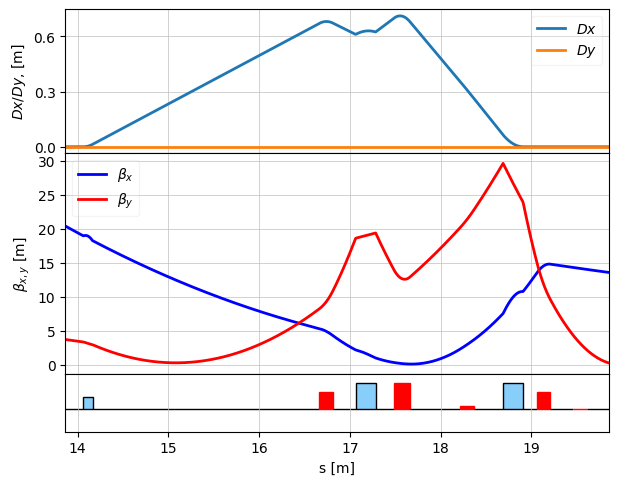

In [22]:

# Design of Transfer to MIR  TMIR

D010 = Drift(l=0.1)
D025 = Drift(l=0.25)
D020 = Drift(l=0.20)
D055 = Drift(l=0.55)
D0325 = Drift(l=0.325)
D100 = Drift(l=1.)
M1 = Marker()
# defining of the quads
Q0TMIR= Quadrupole(l=0.15, k1=5)
Q1TMIR= Quadrupole(l=0.18, k1=7.591419818385525)
Q2TMIR = Quadrupole(l=0.15, k1=0.6492804179761399)
Q3TMIR= Quadrupole(l=0.15, k1=5)
Q4TMIR= Quadrupole(l=0.15, k1=0)
# defining of the bending magnet
#Septom magnet 
BsTMIR=SBend(l=0.1, angle=septum_angle, e1=septum_angle/2, e2=septum_angle/2, tilt=0.0, fint=0.0, eid='MIR_bend')
BTMIR=SBend(l=0.22, angle=0.6, e1=0.3, e2=0.3, tilt=0.0, fint=0.0, eid='MIR_bend')

Tranport_to_MIR=(D020,BsTMIR, D250, Q0TMIR,D025, BTMIR, D020, Q1TMIR, D055,Q2TMIR, D0325, BTMIR,M1, D015, Q3TMIR, D025, Q4TMIR, D025, M1)
lat_Tranport_to_MIR = MagneticLattice(Tranport_to_MIR)

tws_Tranport_to_MIR = twiss(lat_Tranport_to_MIR,tws[-1] ,nPoints=1000)

# plot optical functions.
plot_opt_func(lat_Tranport_to_MIR, tws_Tranport_to_MIR, top_plot = ["Dx", "Dy"], legend=False, font_size=10)
plt.show()

initial value: x =  [7.591419818385525, 0.6492804179761399]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 34
         Function evaluations: 68


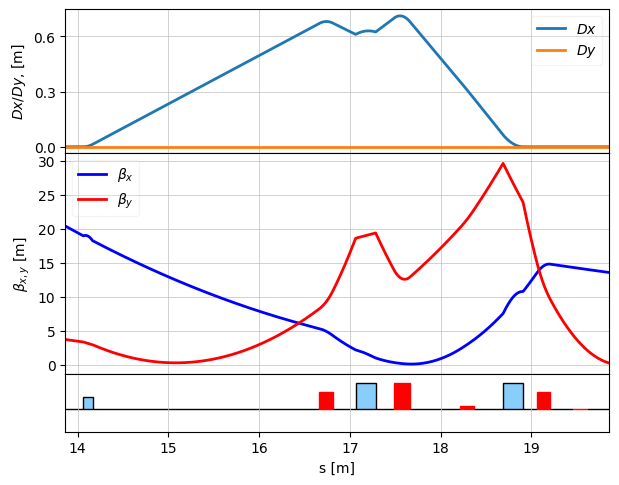

emit_x  = 1e-05
emit_y  = 1e-05
beta_x  = 13.579653253329944
beta_y  = 0.27805873669949577
alpha_x = 0.9012139663859123
alpha_y = 1.8819978038146594
gamma_x = 0.13344866613325726
gamma_y = 16.3343752024298
Dx      = 1.6286778016943462e-08
Dy      = 0.0
Dxp     = 9.595222624388754e-08
Dyp     = 0.0
mux     = 6.846640549486943
muy     = 7.013347083639063
nu_x    = 1.0896766870242574
nu_y    = 1.1162088559802852
E       = 0.053000000000000005
s        = 19.858999999999984

Q1TMIR.k1 =  7.591421811769932
Q2TMIR.k1 =  0.6492735651876986


In [23]:
# Maching zero dispersions at the end 
 # constrains
constr = {M1:{'Dx':0.0000, 'Dy':0.000}, 'periodic':False}
# variables
vars = [Q1TMIR, Q2TMIR]
# initial condition for twiss
tw0=tws[-1]
match(lat_Tranport_to_MIR, constr, vars, tw0, verbose=False)
# let's variable *tws_fodo* will be the twiss 
# parameters on the FODO entrance 
tws_Tranport_to_MIR = twiss(lat_Tranport_to_MIR,tws[-1] ,nPoints=1000)
# plot optical functions.
plot_opt_func(lat_Tranport_to_MIR, tws_Tranport_to_MIR, top_plot = ["Dx", "Dy"], legend=False, font_size=10)
plt.show()
print(tws_Tranport_to_MIR[-1])
print("Q1TMIR.k1 = ", Q1TMIR.k1)
print("Q2TMIR.k1 = ", Q2TMIR.k1)

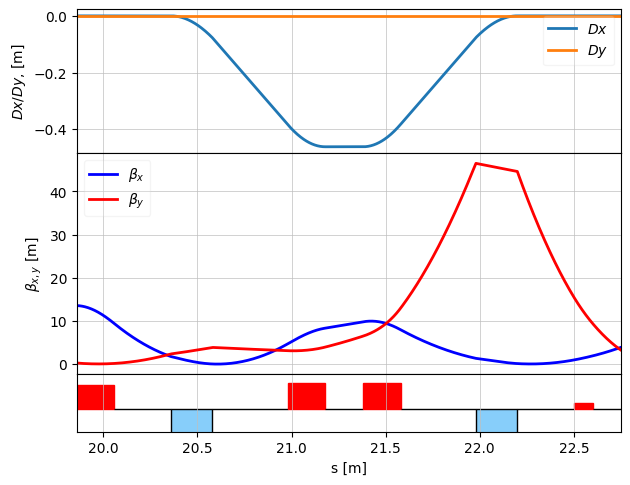

In [24]:
Q5TMIR= Quadrupole(l=0.2, k1=8)
Q6TMIR= Quadrupole(l=0.2, k1=8.791237417530642)
Q7TMIR = Quadrupole(l=0.2, k1=8.791237417530642)
Q8TMIR= Quadrupole(l=0.1, k1=2)
Q9TMIR= Quadrupole(l=0.1, k1=0)
angle=0.6+0.2617993877991494/2
D040=Drift(l=0.40)
D030=Drift(l=0.30)
BTMIR2=SBend(l=0.22, angle=-angle, e1=-angle/2, e2=-angle/2, tilt=0.0, fint=0.0, eid='MIR_bend')
#BTMIR3=SBend(l=0.1, angle=-septum_angle, e1=-septum_angle/2, e2=-septum_angle/2, tilt=0.0, fint=0.0, eid='MIR_bend')
Tranport_to_MIR2=(Q5TMIR,D030, BTMIR2, D040, Q6TMIR, D020,Q7TMIR, D040,BTMIR2, M1, D030,Q8TMIR ,D015,M1)
lat_Tranport_to_MIR2=MagneticLattice(Tranport_to_MIR2)
tws_Tranport_to_MIR2=twiss(lat_Tranport_to_MIR2,tws_Tranport_to_MIR[-1] ,nPoints=1000)
plot_opt_func(lat_Tranport_to_MIR2, tws_Tranport_to_MIR2, top_plot = ["Dx", "Dy"], legend=False, font_size=10)
plt.show()

In [25]:
constr = {M1:{'Dx':0.0000, 'Dy':0.000}, 'periodic':False}
# variables
vars = [Q6TMIR, Q7TMIR]
# initial condition for twiss
tw0=tws_Tranport_to_MIR[-1] 
match(lat_Tranport_to_MIR2, constr, vars, tw0, verbose=False)


print(tws_Tranport_to_MIR[-1])
print("Q6TMIR.k1 = ", Q6TMIR.k1)
print("Q7TMIR.k1 = ", Q7TMIR.k1)

initial value: x =  [8.791237417530642, 8.791237417530642]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 39
         Function evaluations: 75
emit_x  = 1e-05
emit_y  = 1e-05
beta_x  = 13.579653253329944
beta_y  = 0.27805873669949577
alpha_x = 0.9012139663859123
alpha_y = 1.8819978038146594
gamma_x = 0.13344866613325726
gamma_y = 16.3343752024298
Dx      = 1.6286778016943462e-08
Dy      = 0.0
Dxp     = 9.595222624388754e-08
Dyp     = 0.0
mux     = 6.846640549486943
muy     = 7.013347083639063
nu_x    = 1.0896766870242574
nu_y    = 1.1162088559802852
E       = 0.053000000000000005
s        = 19.858999999999984

Q6TMIR.k1 =  8.79123120777966
Q7TMIR.k1 =  8.79124294366251


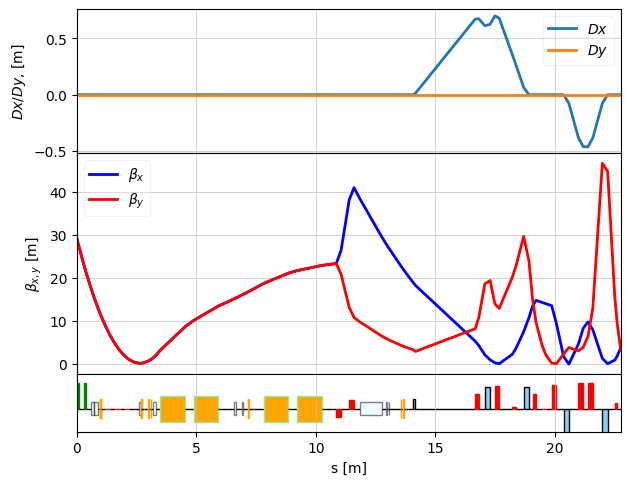

In [26]:
latcell_to_MIR=(T02T1,Tranport_to_MIR,Tranport_to_MIR2)
lat_to_MIR2 = MagneticLattice(latcell_to_MIR)
twsSIR= twiss(lat_to_MIR2,tws0 )
plot_opt_func(lat_to_MIR2, twsSIR, top_plot = ["Dx", "Dy"], legend=False, font_size=10)
plt.show()

In [27]:
latcell_to_MIR=(Tranport_to_MIR,Tranport_to_MIR2)
lat_to_MIR2 = MagneticLattice(latcell_to_MIR)
R = lattice_transfer_map(lat_to_MIR2, energy=0.05)
print("R56 = ", R[4,5]*1000, "mm")

R56 =  426.7838793872928 mm


In [31]:
print(D250.l)

2.5
